**Radom Forest**

**1. Exploratory Data Analysis[EDA]**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
df=pd.read_excel('/content/glass.xlsx', sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.dtypes)

(214, 10)
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

**Data Visualization**

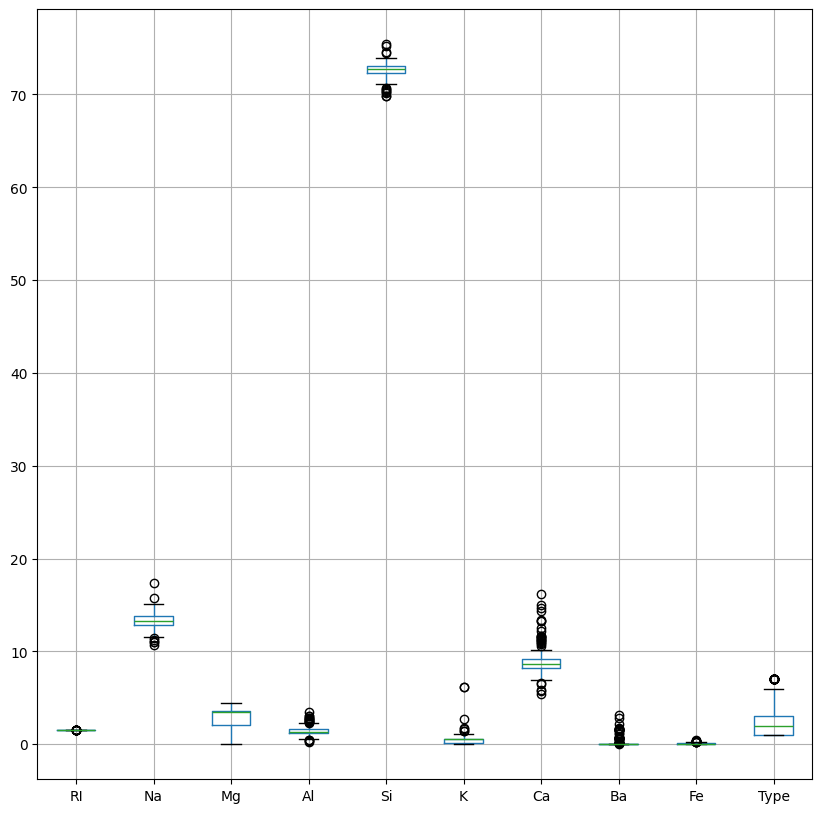

In [ ]:
## box plot
df.boxplot(figsize=(10,10))
plt.show()

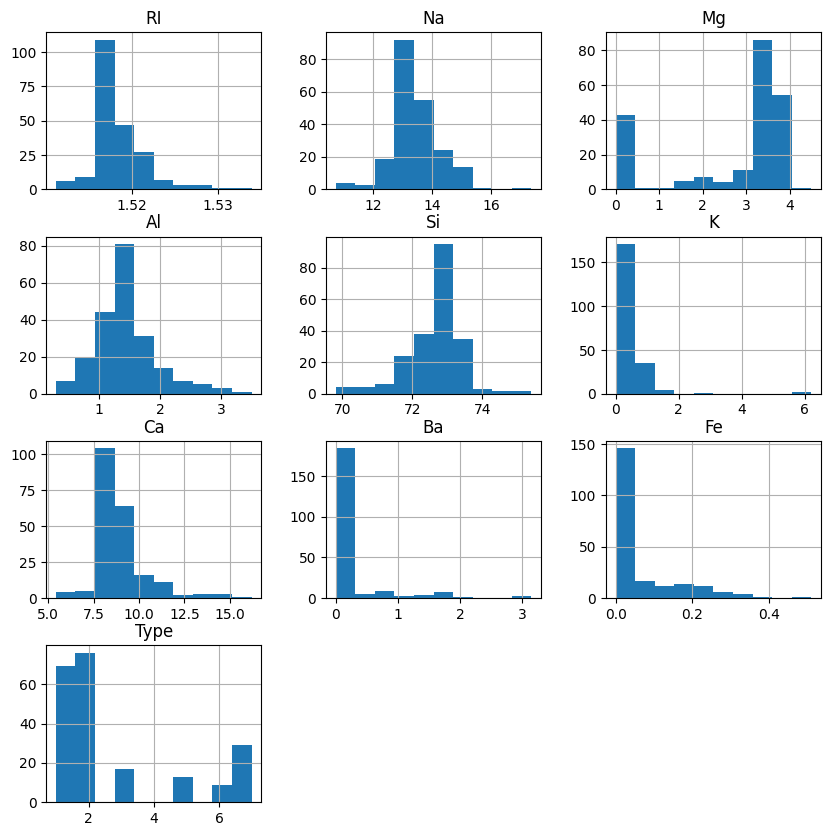

In [ ]:
## histogram
df.hist(figsize=(10,10))
plt.show()

In [ ]:
correaltion_matrix=df.corr()


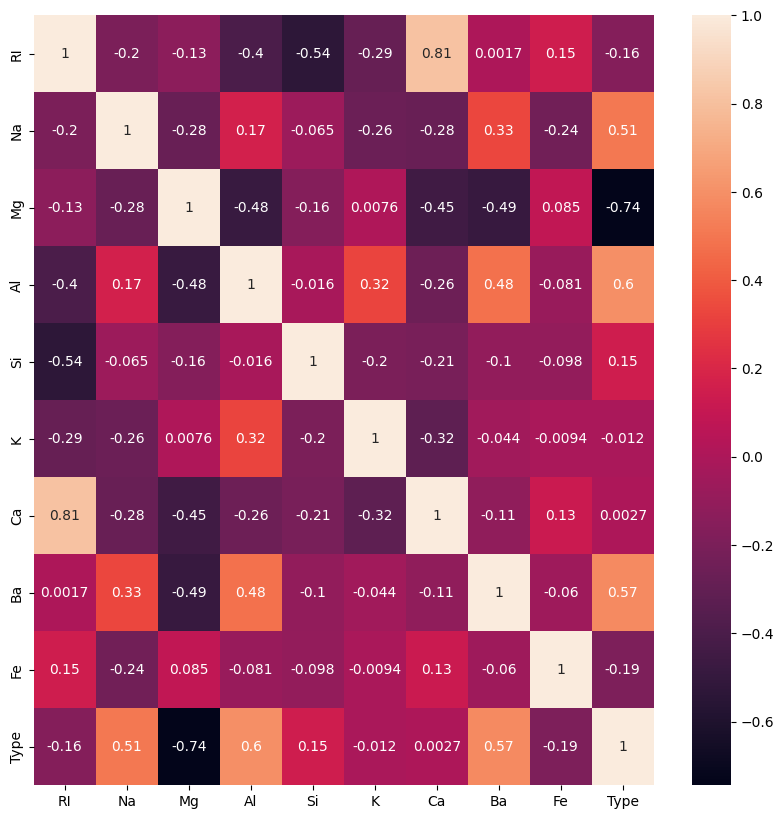

In [ ]:
## Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correaltion_matrix, annot=True)
plt.show()

**Random Forest Model Implementation**

In [ ]:
features=df.drop('Type', axis=1)
target=df['Type']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42, 9)
(171, 9)
(42,)
(171,)


In [ ]:
model=RandomForestClassifier(n_estimators=50, max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=50)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.65      0.82      0.73        57
           2       0.60      0.61      0.60        61
           3       0.25      0.08      0.12        13
           5       0.80      0.36      0.50        11
           6       1.00      0.43      0.60         7
           7       0.76      0.86      0.81        22

    accuracy                           0.65       171
   macro avg       0.68      0.53      0.56       171
weighted avg       0.64      0.65      0.63       171



**5: Bagging and Boosting Methods**

**Bagging**

In [ ]:
dt=DecisionTreeClassifier()
model2=BaggingClassifier(estimator=dt,n_estimators=100)
model2.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
y_preds=model2.predict(x_test)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.66      0.88      0.75        57
           2       0.66      0.61      0.63        61
           3       0.50      0.15      0.24        13
           5       0.67      0.36      0.47        11
           6       1.00      0.57      0.73         7
           7       0.80      0.91      0.85        22

    accuracy                           0.68       171
   macro avg       0.71      0.58      0.61       171
weighted avg       0.68      0.68      0.66       171



**Boosting**

In [ ]:
base_estimator=DecisionTreeClassifier()

In [ ]:
## Applying Adaboost Classifier
model3=AdaBoostClassifier(estimator=base_estimator,n_estimators=100)
model3.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
y_pred=model3.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.63      0.66        57
           2       0.56      0.67      0.61        61
           3       0.30      0.23      0.26        13
           5       0.67      0.55      0.60        11
           6       0.33      0.14      0.20         7
           7       0.83      0.91      0.87        22

    accuracy                           0.63       171
   macro avg       0.56      0.52      0.53       171
weighted avg       0.62      0.63      0.62       171

